In [1]:
import jax
import jax.numpy as jnp

FAQ:
    1. If you receive an `ptxas` error it is likely because your cuda is out of date. To update your version of cude run:
    `conda install cuda -c nvidia`

In [3]:
x = jnp.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
x

Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [5]:
long_vector = jnp.arange(int(1e7))
%timeit jnp.dot(long_vector, long_vector).block_until_ready()

203 µs ± 6.35 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [6]:
def sum_of_squares(x):
    return jnp.sum(x**2)

In [7]:
sum_of_squares_dx = jax.grad(sum_of_squares)

### Facts about grad

1. `jax.grad` computes that gradient, `jax.grad(f)(x)` computes the gradient at `x`. 
2. `jax.grad` computes the gradient with respect to the first variable in the function signature, i.e. for `f(x, y)`, the function `jax.grad(f)` computes the gradient with respect to `x` but not `y`.

In [8]:
x = jnp.asarray([1.0, 2.0, 3.0, 4.0])

In [9]:
print(sum_of_squares(x))

30.0


In [10]:
print(sum_of_squares_dx(x))

[2. 4. 6. 8.]


In [11]:
def sum_squared_error(x, y):
    return jnp.sum((x-y)**2)

sum_squared_error_dx = jax.grad(sum_squared_error)

In [12]:
y = jnp.asarray([1.1, 2.1, 3.1, 4.1])
print(sum_squared_error_dx(x, y))

[-0.20000005 -0.19999981 -0.19999981 -0.19999981]


In [13]:
jax.grad(sum_squared_error, argnums=(0, 1))(x, y)  # Find the gradient wrt both x & y

(Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32),
 Array([0.20000005, 0.19999981, 0.19999981, 0.19999981], dtype=float32))

In [14]:
jax.value_and_grad(sum_squared_error)(x, y)

(Array(0.03999995, dtype=float32),
 Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32))

In [15]:
def squared_error_with_aux(x, y):
    return sum_squared_error(x, y), x-y

In [16]:
jax.grad(squared_error_with_aux)(x, y)

TypeError: Gradient only defined for scalar-output functions. Output was (Array(0.03999995, dtype=float32), Array([-0.10000002, -0.0999999 , -0.0999999 , -0.0999999 ], dtype=float32)).

In [17]:
jax.grad(squared_error_with_aux, has_aux=True)(x, y)

(Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32),
 Array([-0.10000002, -0.0999999 , -0.0999999 , -0.0999999 ], dtype=float32))

In [19]:
import numpy as np
import matplotlib.pyplot as plt

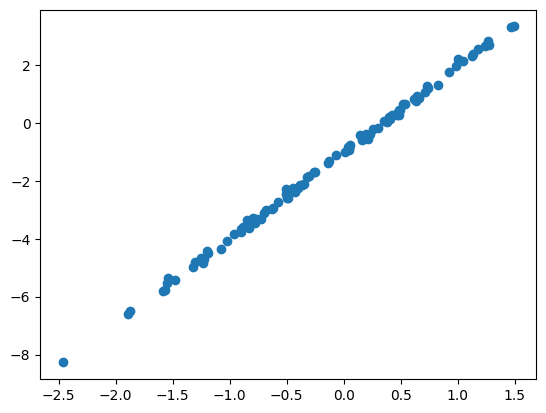

In [20]:
xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise 

plt.scatter(xs, ys)

In [21]:
def model(theta, x):
    """Computes wx + b on a batch of input x."""
    w, b = theta
    return w * x + b

In [22]:
def loss_fn(theta, x, y):
    prediction = model(theta, x)
    return jnp.mean((prediction-y)**2)

In [24]:
@jax.jit
def update(theta, x, y, lr=0.1):
    return theta - lr * jax.grad(loss_fn)(theta, x, y)

w: 2.97, b: -1.00


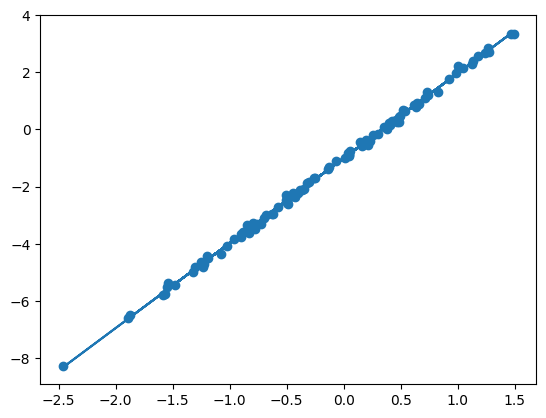

In [25]:
theta = jnp.array([1., 1.])

for _ in range(1000):
    theta = update(theta, xs, ys)
    
plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))
w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")